In [125]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from data.io import load_data

import pandas as pd
import numpy as np

%matplotlib inline

# Adiciona o diretório raiz do projeto (titanic/) ao sys.path
sys.path.append(str(Path().resolve().parent))

In [ ]:
# Carregar os dados

df_train = load_data('train.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Verificar nans

display(df_train.info())

df_train.columns[df_train.isna().any(axis=0)].to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

['Age', 'Cabin', 'Embarked']

In [29]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Exploração dos dados 

profile = ProfileReport(df_train, explorative=True, title="Titanic Report", minimal=False)

output_path = Path().resolve().parent / "reports" / "titanic_report.html"

profile.to_file(output_path)


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 104.65it/s]


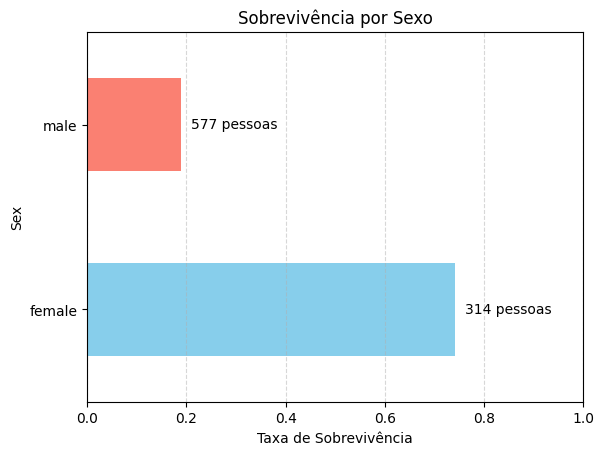

In [ ]:
survival_rates = df_train.groupby('Sex')['Survived'].mean()

counts = df_train['Sex'].value_counts()

ax = survival_rates.plot.barh(color=["skyblue", "salmon"])
plt.xlabel("Taxa de Sobrevivência")
plt.title("Sobrevivência por Sexo")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.5)

for i, (sex, rate) in enumerate(survival_rates.items()):
    total = counts[sex]
    plt.text(rate + 0.02, i, f"{total} pessoas", va='center', fontsize=10)

plt.show()


In [94]:
df_train.groupby('Survived')['Fare'].agg(
    mean='mean',
    std='std',
    llimite=lambda x: x.mean() + 3 * x.std()
)


,mean,std,llimite
Survived,,,
0,22.117887,31.388207,116.282506
1,48.395408,66.596998,248.186402


In [ ]:
['FareRange'] = pd.cut(df_train['Fare'],100)

survival_rates = df_train.groupby('FareRange')['Survived'].agg(['mean','count'])

survival_rates#.sortdf_train_values(by='count', ascending=False)

C:\Users\jnrcr\AppData\Local\Temp\ipykernel_2076\1056175557.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df_train.groupby('FareRange')['Survived'].agg(['mean','count'])


,mean,count
FareRange,,
"(-0.512, 5.123]",0.058824,17
"(5.123, 10.247]",0.206250,320
"(10.247, 15.37]",0.387597,129
"(15.37, 20.493]",0.509434,53
"(20.493, 25.616]",0.372093,43
...,...,...
"(486.713, 491.836]",NaN,0
"(491.836, 496.959]",NaN,0
"(496.959, 502.083]",NaN,0


In [131]:
bins = [-np.inf, 20, 50, 100, np.inf]
labels = [1, 2, 3, 4]

df_train['FareRange'] = pd.cut(df_train['Fare'], bins=bins, labels=labels)

survival_rates = df_train.groupby('FareRange')['Survived'].agg(['mean','count'])

print(survival_rates)

               mean  count
FareRange                 
1          0.277670    515
2          0.416667    216
3          0.654206    107
4          0.735849     53


C:\Users\jnrcr\AppData\Local\Temp\ipykernel_2076\3932988104.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df_train.groupby('FareRange')['Survived'].agg(['mean','count'])


In [139]:
df_train['AgeRange'] = pd.cut(df_train['Age'],5)

survival_rates = df_train.groupby('AgeRange')['Survived'].agg(['mean','count'])

survival_rates#.sort_values(by='mean', ascending=False)

C:\Users\jnrcr\AppData\Local\Temp\ipykernel_2076\1912589505.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df_train.groupby('AgeRange')['Survived'].agg(['mean','count'])


,mean,count
AgeRange,,
"(0.34, 16.336]",0.550000,100
"(16.336, 32.252]",0.369942,346
"(32.252, 48.168]",0.404255,188
"(48.168, 64.084]",0.434783,69
"(64.084, 80.0]",0.090909,11


In [141]:
bins = [-np.inf, 18, 30, 50, np.inf]
labels = [1, 2, 3, 4]

df_train['AgeRange'] = pd.cut(df_train['Age'], bins=bins, labels=labels)

survival_rates = df_train.groupby('AgeRange')['Survived'].agg(['mean','count'])

print(survival_rates)

              mean  count
AgeRange                 
1         0.503597    139
2         0.355556    270
3         0.423237    241
4         0.343750     64


C:\Users\jnrcr\AppData\Local\Temp\ipykernel_2076\664510799.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df_train.groupby('AgeRange')['Survived'].agg(['mean','count'])
